In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
_distutils = importlib.import_module('setuptools._distutils')
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import RandomizedSearchCV

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_risk_dataset.csv')

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


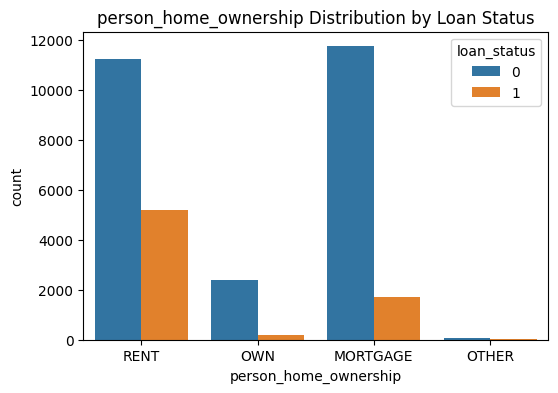


loan_intent:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


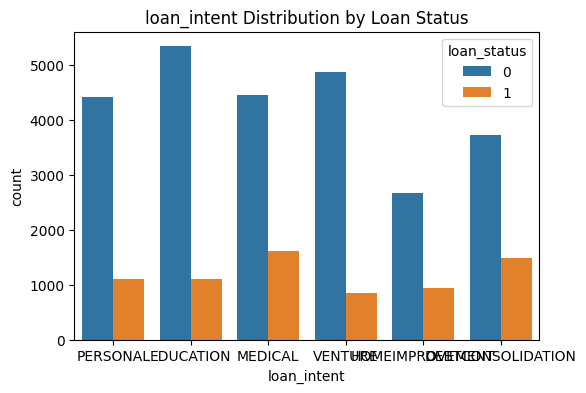


loan_grade:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


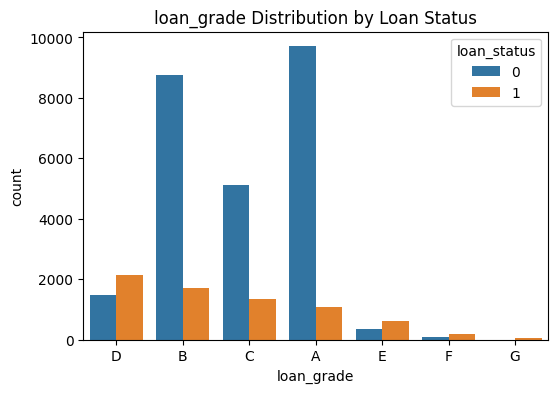


cb_person_default_on_file:
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


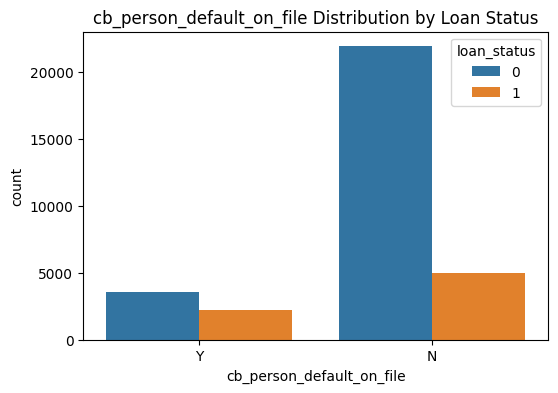


person_age:
count    32581.000000
mean        27.734600
std          6.348078
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


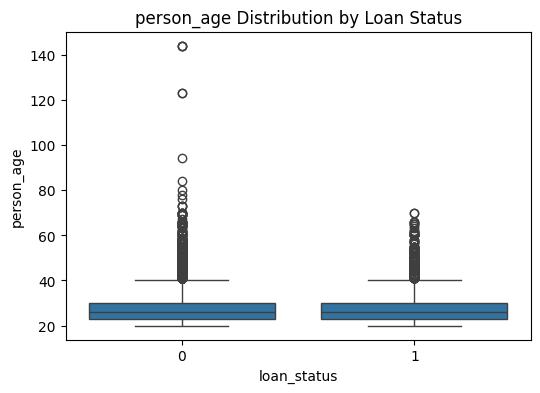


person_income:
count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: person_income, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


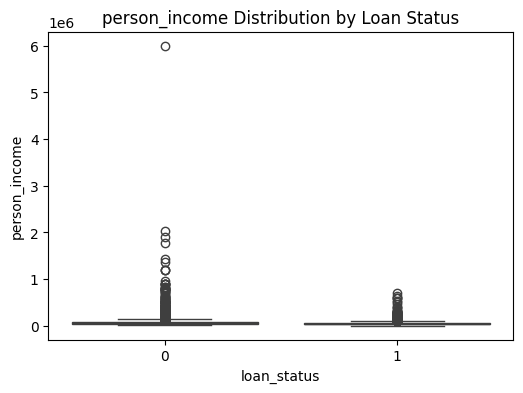


person_emp_length:
count    31686.000000
mean         4.789686
std          4.142630
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


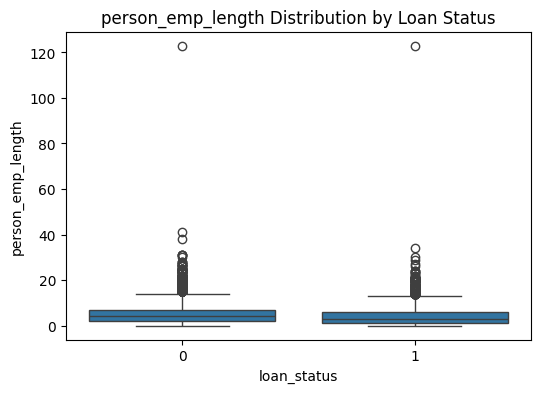


loan_amnt:
count    32581.000000
mean      9589.371106
std       6322.086646
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


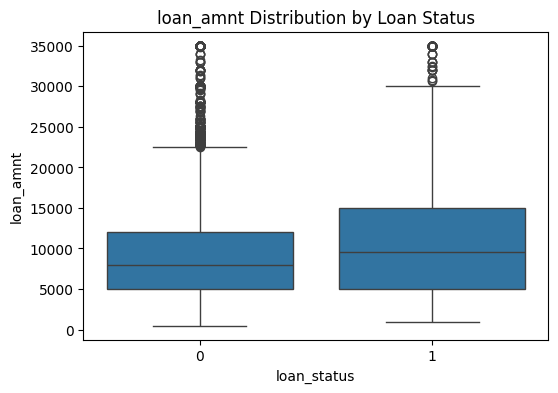


loan_int_rate:
count    29465.000000
mean        11.011695
std          3.240459
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


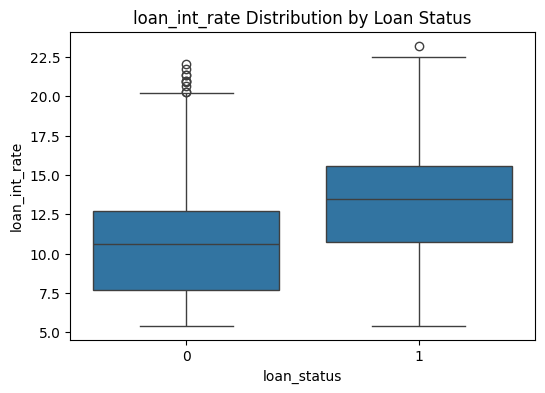


loan_status:
count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


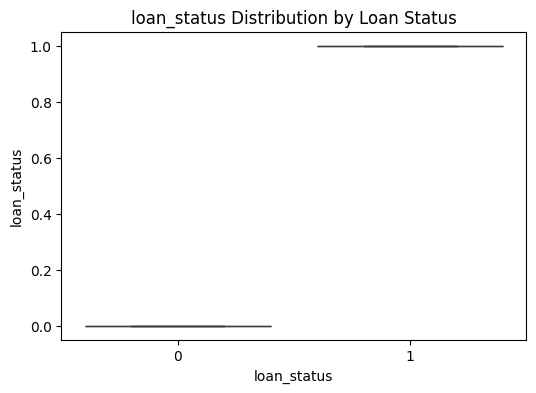


loan_percent_income:
count    32581.000000
mean         0.170203
std          0.106782
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


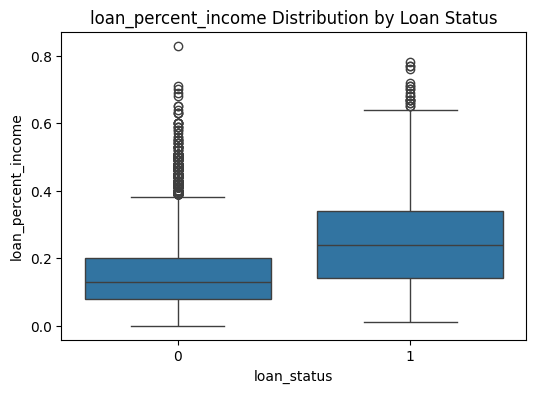


cb_person_cred_hist_length:
count    32581.000000
mean         5.804211
std          4.055001
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


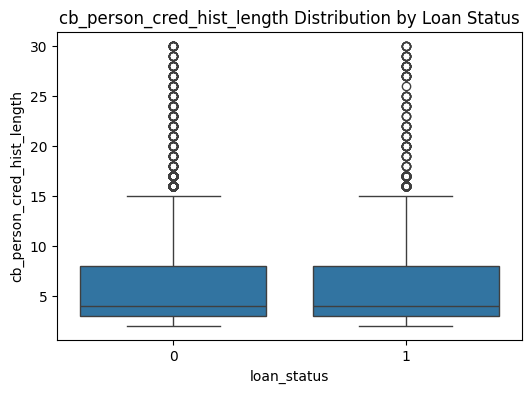


Correlation Matrix:
                            person_age  person_income  person_emp_length  \
person_age                    1.000000       0.173202           0.163106   
person_income                 0.173202       1.000000           0.134268   
person_emp_length             0.163106       0.134268           1.000000   
loan_amnt                     0.050787       0.266820           0.113082   
loan_int_rate                 0.012580       0.000792          -0.056405   
loan_status                  -0.021629      -0.144449          -0.082489   
loan_percent_income          -0.042411      -0.254471          -0.054111   
cb_person_cred_hist_length    0.859133       0.117987           0.144699   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.050787       0.012580    -0.021629   
person_income                0.266820       0.000792    -0.144449   
person_emp_length            0.113082      -0.056405    -0.082489   
loan_amnt         

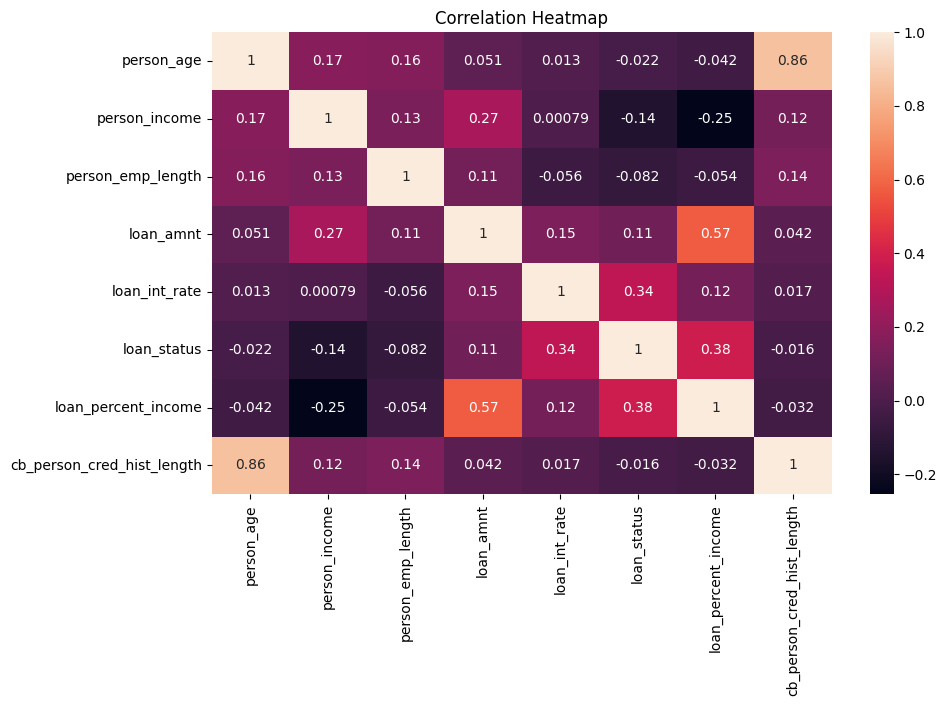

In [ ]:
print(data.head())


#Understanding the features
print(data.info())
print(data.describe())


#Analyzing categorical features
for col in ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']:
    print(f"\n{col}:")
    print(data[col].value_counts())
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='loan_status', data=data)
    plt.title(f'{col} Distribution by Loan Status')
    plt.show()

#Analyzing numerical features
numeric_cols = data.select_dtypes(include=['number']).columns

for col in numeric_cols:
    print(f"\n{col}:")
    print(data[col].describe())
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='loan_status', y=col, data=data)
    plt.title(f'{col} Distribution by Loan Status')
    plt.show()

#Feature relationships
correlation = data[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(correlation)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()

Missing Values:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64
Remaining Missing Values:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


<ipython-input-6-212737db0fa8>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loan_intent_ordinal'] = ordinal_encoder.fit_transform(data[['loan_intent']])
<ipython-input-6-212737db0fa8>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['person_home_ownership_ordinal'] = ordinal_encoder.fit_transform(data[['person_home_ownership']])
<ipython-input-6-212737db0fa8>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

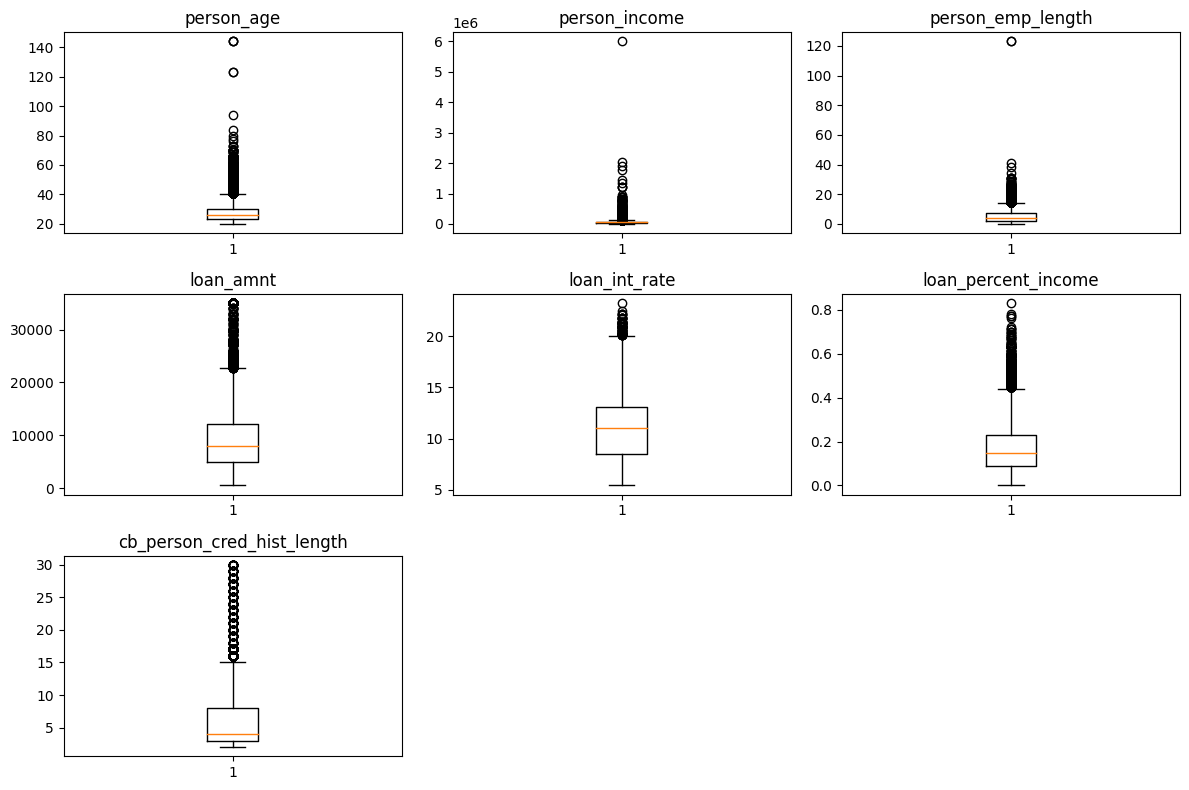

loan_status
0    25399
1     7075
Name: count, dtype: int64
Class distribution in training set: loan_status
0    16255
1     4528
Name: count, dtype: int64
Class distribution in validation set: loan_status
0    4064
1    1132
Name: count, dtype: int64
Class distribution in test set: loan_status
0    5080
1    1415
Name: count, dtype: int64
person_age                           0
person_income                        0
person_home_ownership                0
person_emp_length                    0
loan_intent                          0
loan_grade                           0
loan_amnt                            0
loan_int_rate                        0
loan_status                          0
loan_percent_income                  0
cb_person_default_on_file            0
cb_person_cred_hist_length           0
age_bin                              0
debt_to_income_ratio                 0
age_bin_encoded                      0
age_bin_x_debt_to_income_ratio       0
loan_intent_ordinal               

In [ ]:
# Identify missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Impute missing values in `person_emp_length` with the median
data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].median())

# Impute missing values in `loan_int_rate` with the mean
data['loan_int_rate'] = data['loan_int_rate'].fillna(data['loan_int_rate'].mean())

# Check for remaining missing values
remaining_missing = data.isnull().sum()
print("Remaining Missing Values:")
print(remaining_missing)

# Feature engineering
data['age_bin'] = pd.cut(data['person_age'], bins=[18, 30, 45, 60, 100], labels=['Young', 'Middle-Aged', 'Older', 'Senior'])
data['debt_to_income_ratio'] = data['loan_amnt'] / data['person_income']

le = LabelEncoder()
data['age_bin_encoded'] = le.fit_transform(data['age_bin'])
data['age_bin_x_debt_to_income_ratio'] = data['age_bin_encoded'] * data['debt_to_income_ratio']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[['person_age', 'person_income']])

# Categorical feature encoding
data['person_home_ownership'].value_counts(normalize=True) * 100
data = data[data['person_home_ownership'] != 'OTHER']
data['person_home_ownership'].value_counts()

ordinal_encoder = OrdinalEncoder(categories=[['DEBTCONSOLIDATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'EDUCATION', 'VENTURE']])
data['loan_intent_ordinal'] = ordinal_encoder.fit_transform(data[['loan_intent']])

ordinal_encoder = OrdinalEncoder(categories=[['OWN', 'RENT', 'MORTGAGE']])
data['person_home_ownership_ordinal'] = ordinal_encoder.fit_transform(data[['person_home_ownership']])

ordinal_encoder = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']])
data['loan_grade_ordinal'] = ordinal_encoder.fit_transform(data[['loan_grade']])

le = LabelEncoder()
data['cb_person_default_on_file_encoded'] = le.fit_transform(data['cb_person_default_on_file'])


#Feature Scaling
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    plt.boxplot(data[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

data['person_age'] = scaler_standard.fit_transform(data[['person_age']])
data[['person_income', 'loan_amnt']] = scaler_standard.fit_transform(data[['person_income', 'loan_amnt']])
data['person_emp_length'] = scaler_standard.fit_transform(data[['person_emp_length']])
data['loan_int_rate'] = scaler_minmax.fit_transform(data[['loan_int_rate']])
data['loan_percent_income'] = scaler_standard.fit_transform(data[['loan_percent_income']])
data['cb_person_cred_hist_length'] = scaler_minmax.fit_transform(data[['cb_person_cred_hist_length']])


#Splitting data
class_distribution = data['loan_status'].value_counts()
print(class_distribution)

X = data.drop('loan_status', axis=1)
y = data['loan_status']

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = next(splitter.split(X, y))
X_train_full, X_test = X.iloc[train_index], X.iloc[test_index]
y_train_full, y_test = y.iloc[train_index], y.iloc[test_index]

splitter_val = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, val_index = next(splitter_val.split(X_train_full, y_train_full))
X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]

print("Class distribution in training set:", y_train.value_counts())
print("Class distribution in validation set:", y_val.value_counts())
print("Class distribution in test set:", y_test.value_counts())

# Check for remaining NaN values after imputation
data.dropna(subset=['age_bin'], inplace=True)
print(data.isnull().sum())

# Exclude categorical variables that are already encoded
X_train = X_train.drop(columns=['age_bin', 'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])
X_test = X_test.drop(columns=['age_bin', 'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])
X_val = X_val.drop(columns=['age_bin', 'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

# Handling class imbalance
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



**Logistic Regression Evaluation Results:**
{'Accuracy': 0.7858352578906851, 'Precision': 0.5055350553505535, 'Recall': 0.7745583038869258, 'F1-score': 0.6117778397990511, 'Confusion Matrix': array([[4008, 1072],
       [ 319, 1096]])}

**Decision Tree Evaluation Results:**
{'Accuracy': 0.8717474980754426, 'Precision': 0.6825595984943539, 'Recall': 0.768904593639576, 'F1-score': 0.7231638418079096, 'Confusion Matrix': array([[4574,  506],
       [ 327, 1088]])}

**Random Forest Evaluation Results:**
{'Accuracy': 0.9228637413394919, 'Precision': 0.8932874354561101, 'Recall': 0.7335689045936395, 'F1-score': 0.8055878928987195, 'Confusion Matrix': array([[4956,  124],
       [ 377, 1038]])}

**Gradient Boosting Evaluation Results:**
{'Accuracy': 0.9123941493456506, 'Precision': 0.8389423076923077, 'Recall': 0.7399293286219081, 'F1-score': 0.7863312054074352, 'Confusion Matrix': array([[4879,  201],
       [ 368, 1047]])}

**Support Vector Machine (SVM) Evaluation Results:**
{'Accuracy': 

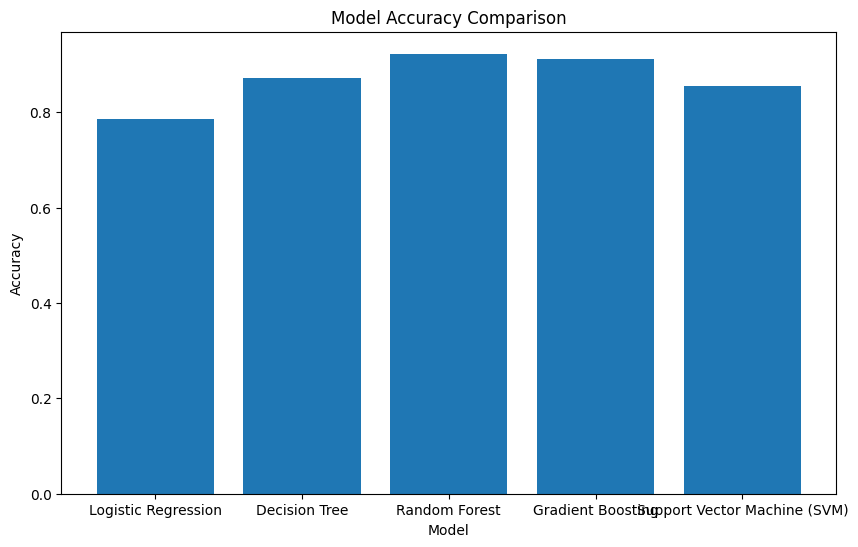

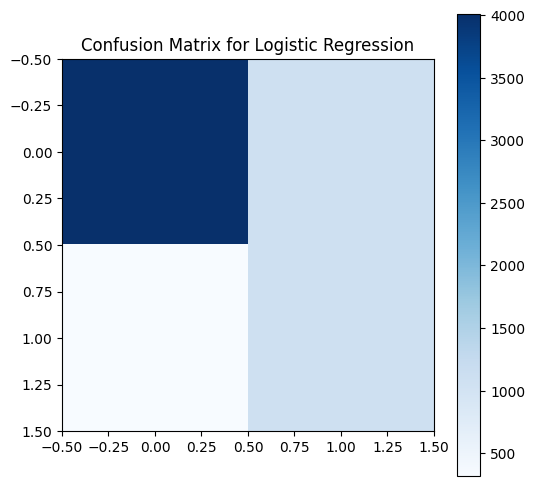

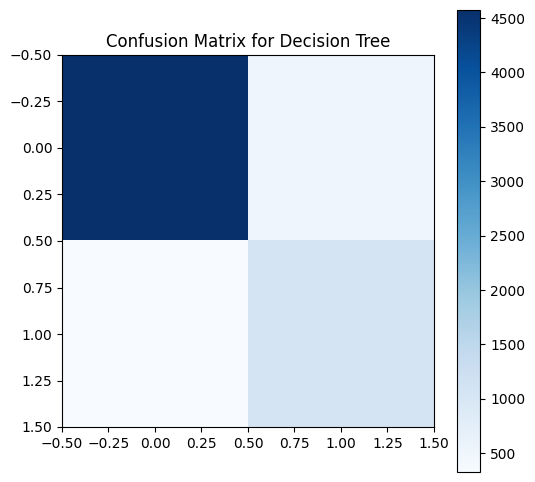

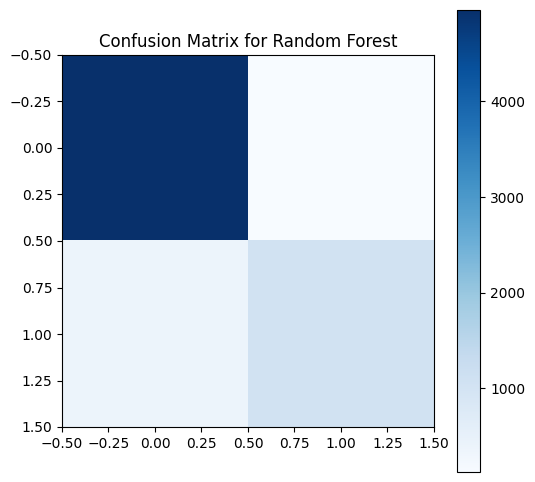

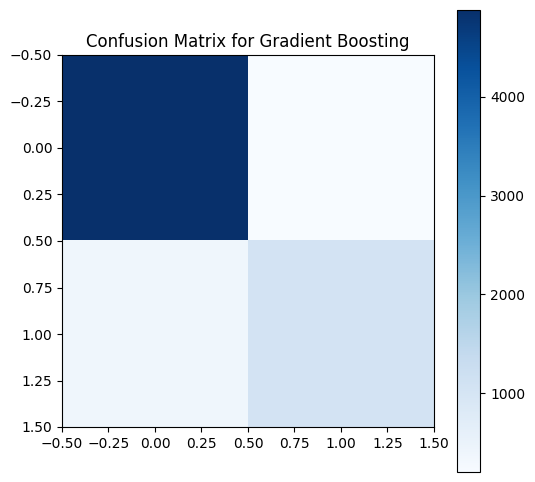

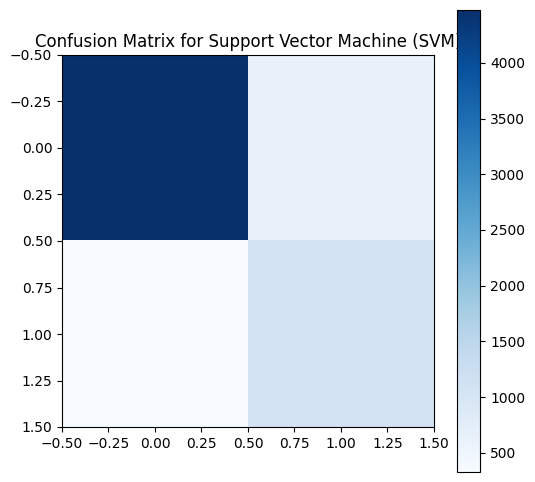

In [ ]:
# Model Training and Evaluation
models = {
    "Logistic Regression": LogisticRegression,
    "Decision Tree": DecisionTreeClassifier,
    "Random Forest": RandomForestClassifier,
    "Gradient Boosting": GradientBoostingClassifier,
    "Support Vector Machine (SVM)": SVC,
}

results = {}

for model_name, model_creator in models.items():
    model = model_creator()
    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Confusion Matrix": confusion_mat
    }

    print(f"\n**{model_name} Evaluation Results:**")
    print(results[model_name])

# Models Comparison
model_names = list(results.keys())
accuracies = [results[model]["Accuracy"] for model in model_names]
precisions = [results[model]["Precision"] for model in model_names]
recalls = [results[model]["Recall"] for model in model_names]
f1_scores = [results[model]["F1-score"] for model in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

for model_name, result in results.items():
    plt.figure(figsize=(6, 6))
    plt.imshow(result["Confusion Matrix"], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.colorbar()
    plt.show()

In [ ]:
#Hyperparameter Tuning for Random Forest:

random_forest = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(random_forest, param_grid, n_iter=10, cv=5)

random_search.fit(X_train_resampled, y_train_resampled)

best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("Best parameters:", best_params)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion_mat)

Best parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 8}
Accuracy: 0.894688221709007
Precision: 0.7650471356055112
Recall: 0.7455830388692579
F1-score: 0.7551896921975663
Confusion Matrix:
 [[4756  324]
 [ 360 1055]]


person_age: 0.006796801347428166
person_income: 0.10038646705314277
person_emp_length: 0.02231109029954117
loan_amnt: 0.02762355266513359
loan_int_rate: 0.11105946142240346
loan_percent_income: 0.14522907124614862
cb_person_cred_hist_length: 0.012617763404271745
debt_to_income_ratio: 0.1218260684075152
age_bin_encoded: 0.0005541764935158225
age_bin_x_debt_to_income_ratio: 0.07805140175911732
loan_intent_ordinal: 0.03500245231572714
person_home_ownership_ordinal: 0.0862158608998189
loan_grade_ordinal: 0.24275246116572732
cb_person_default_on_file_encoded: 0.009573371520508798


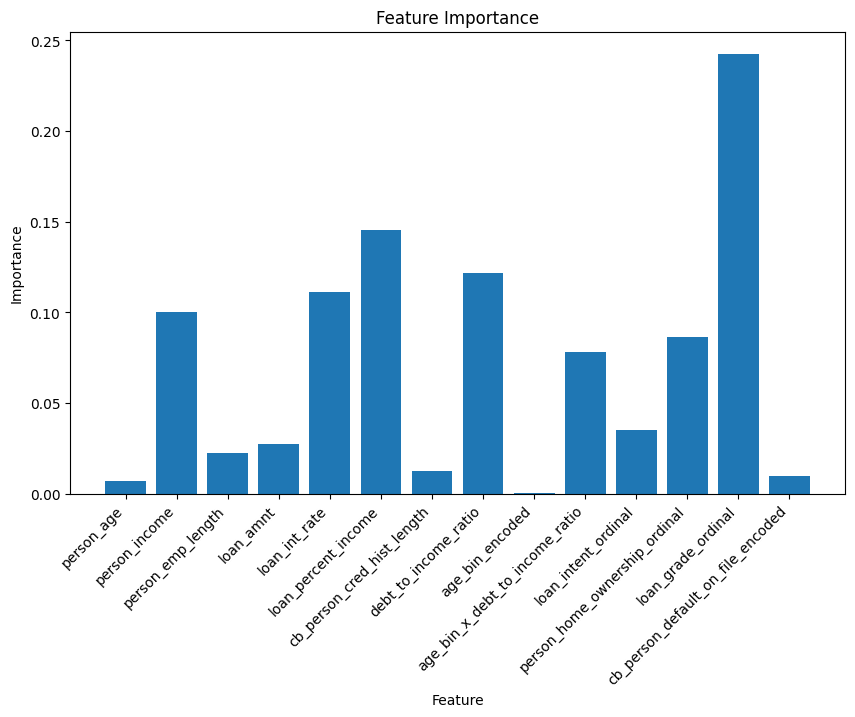

In [ ]:
#Feature Importance Analysis

importances = best_model.feature_importances_

for feature, importance in zip(X_train_resampled.columns, importances):
    print(f"{feature}: {importance}")

plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, importances)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()


In [ ]:
import joblib
import os

joblib.dump(X_val, 'X_val.pkl')
joblib.dump(y_val, 'y_val.pkl')
joblib.dump(best_model, 'credit_risk_model.pkl')


['credit_risk_model.pkl']